In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("Kmean_dataset.csv")

In [3]:
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [5]:
x_train = df.to_numpy()

In [6]:
#initialising centroids
def centroid_init(k, x):
    centroid_lst = []
    for i in range(k):
        u_i = x[random.randint(0, x.shape[0]-1)]
        centroid_lst.append(u_i)
    return np.array(centroid_lst)

In [7]:
def distance(k, x, centroid):
    c_i = []
    for i in range(x.shape[0]):
        dis = np.sum(np.square(centroid - x[i]), axis=1)
        c_i.append(np.argmin(dis))
    return np.array(c_i)

In [8]:
def avg_centroid(k, x, centroid):
    c_i = distance(k, x, centroid)
    sum = np.zeros(centroid.shape)
    length_arr = np.zeros(k)
    for i in range(len(c_i)):
        sum[c_i[i]] += x[i]
        length_arr[c_i[i]] += 1
    for i in range(k):
        centroid[i] = sum[i]/length_arr[i]
    return centroid

In [9]:
def distortion(x, centroid, k):
    c_i = distance(k, x, centroid)
    distortion = 0
    for i in range(len(c_i)):
        distortion += np.sum(np.square(centroid[c_i[i]] - x[i]))
    return distortion

In [10]:
k = 5;
num_iters = 100
centroid = centroid_init(k, x_train)
j_his = []

In [11]:
for i in range(num_iters):
    c_i = distance(k, x_train, centroid)
    centroid = avg_centroid(k, x_train, centroid)
    j = distortion(x_train, centroid, k)
    j_his.append(j)
    if (i % 10 == 0):
        print(f"distortion: {j}")

distortion: 1607864.471838639
distortion: 996446.5366701857
distortion: 996446.5366701857
distortion: 996446.5366701857
distortion: 996446.5366701857
distortion: 996446.5366701857
distortion: 996446.5366701857
distortion: 996446.5366701857
distortion: 996446.5366701857
distortion: 996446.5366701857


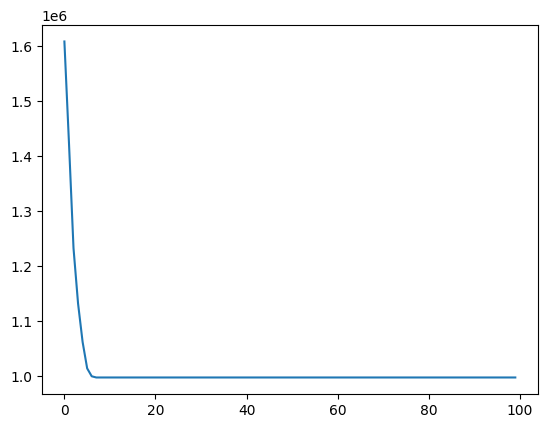

In [12]:
plt.plot(np.arange(num_iters), j_his)